In [5]:
import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F

import numpy as np
import shap

In [6]:
def plot_images(images, targets, indices):
    """
    Plot sample images and their target labels
    """
    import matplotlib.pyplot as plt
    fig = plt.figure()
    for i, idx in enumerate(indices):
        plt.subplot(3,4,i+1)
        plt.tight_layout()
        plt.imshow(images[idx][0], cmap='gray', interpolation='none')
        plt.title("Ground Truth: {}".format(targets[idx]))
        plt.xticks([])
        plt.yticks([])
    plt.savefig('cifar10.png')
    plt.show()
    
def get_sample(images, targets):
        """
        Get last occurence of a label in target sample
        return int[]
        """
        indices=[]
        for i in range(10):
            try:
                index = torch.where(targets==i)
                indices.append(index[0][-1].item())
            except: 
                print("does not exist")
        return images[indices], indices

def imshow(img):
    import matplotlib.pyplot as plt
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
def plot_cifar10_images(images, targets, indices):
    import matplotlib.pyplot as plt
    classes = ['Plane', 'Car', 'Bird', 'Cat','Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    fig = plt.figure()
    for i, idx in enumerate(indices):
        plt.subplot(3,4,i+1)
        img = torchvision.utils.make_grid(images[idx])
        imshow(img)
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
        plt.title("{}".format(classes[targets[idx]]))
        plt.xticks([])
        plt.yticks([])
    plt.savefig('cifar10.png')
    plt.show()

In [20]:
# MNIST
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data/mnist', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=64, shuffle=True)

In [9]:
# Fashion MNIST
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        (0.1307,), (0.3081,))
])
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.FashionMNIST(
            'data/fmnist', 
            train=True, download=True,
            transform=transform),
    batch_size=64, 
    shuffle=True)
        

In [8]:
# CIFAR        
transform = torchvision.transforms.Compose([torchvision.transforms.transforms.ToTensor(),torchvision.transforms.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10(
    'data/cifar10', 
    train=True, download=True,
    transform=transform),
    batch_size=64, 
    shuffle=True)

Files already downloaded and verified


KeyboardInterrupt: 

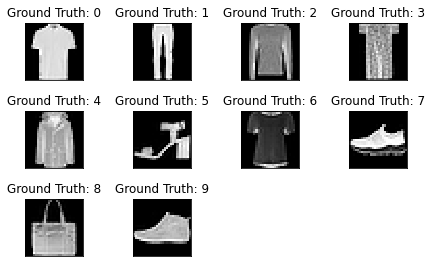

In [10]:
examples = enumerate(train_loader)
batch_idx, (images, targets) = next(examples)
sample_images, sample_indices = get_sample(images, targets) 
plot_images(images, targets, sample_indices)

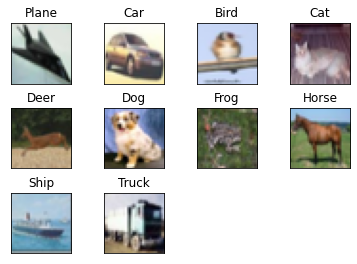

In [31]:
examples = enumerate(train_loader)
batch_idx, (images, targets) = next(examples)
sample_images, sample_indices = get_sample(images, targets) 
plot_cifar10_images(images, targets, sample_indices)

In [ ]:
sample_images, sample_indices = get_sample(images, targets) 
targets[sample_indices[4]] = 5  
plot_shap_images(images, targets, sample_indices)